<h2><span class="header-section-number">2.1</span> Course thesis</h2>
<p>The goal of this course is to learn techniques of causal inference in a way that builds on students’ existing intuition and experience with generative machine learning. Moreover, we will do so using frameworks from generative machine learning, include tools for building deep neural networks. Further, when reasoning about causal inference problems, we will bias the case studies to those seen in professional environments where data scientists and machine learning engineers build and manage in-product machine learning models.</p>
<div id="causal-modeling-as-generative-ml" class="section level3">
<h3><span class="header-section-number">2.1.1</span> Causal modeling as generative ML</h3>
<p>More specifically, this course focuses on machine learning in the following two ways.</p>
<ul>
<li>We will place causal inference firmly on a foundation of model-based generative machine learning. Our goal is to build machine learning systems that think in causal terms, such as confounding, interventions, and counterfactuals.</li>
<li>If you peruse the causal inference literature, you will see examples similar to the A/B test example from epidemiology, econometrics, and clinical trials. This course focuses on the kinds of cases data scientists experience in professional settings, particularly in the tech industry. The focus of the tech industry is shifting towards problems where A/B test becomes more complicated and not feasible. We will cover some advanced techniques like how to deal with confounding, how to build up an online and offline learning and policy evaluation for Markov decision processes that automates testing. We will also cover a little bit of relevant literature from Game theory (Auction models) and Reinforcement learning (policy evaluation and improvement) at the end.</li>
</ul>
</div>
<div id="what-is-left-out" class="section level3">
<h3><span class="header-section-number">2.1.2</span> What is left out</h3>
<p>Causal inference spans many other concepts, and we won’t be able to cover all of them. Though the concepts below are essential, they are out of scope for this course.</p>
<ul>
<li>Causal discovery</li>
<li>Causal inference with regression models and various canonical SCM models</li>
<li>Doubly-robust estimation</li>
<li>Interference due to network effects (important in social network tech companies like Facebook or Twitter)</li>
<li>heterogeneous treatment effects</li>
<li>deep architectures for causal effect inference</li>
<li>causal time series models</li>
<li>algorithmic information theory approaches to causal inference</li>
</ul>
</div>
<div id="examples-of-problems-in-causal-inference" class="section level3">
<h3><span class="header-section-number">2.1.3</span> Examples of problems in causal inference</h3>
<p>To properly contextualize our motivation, we start by understanding how causal inference developed as a field across domains, including economics, biology, social science, computer science, anthropology, epidemiology, statistics.</p>
<div id="estimation-of-causal-effects" class="section level4">
<h4><span class="header-section-number">2.1.3.1</span> Estimation of causal effects</h4>
<p>The problem of finding causal effects is the primary motivation of researchers in these domains. For example, in the late 80s and 90s, doctors used to prescribe <a href="https://www.mayoclinic.org/diseases-conditions/menopause/in-depth/hormone-replacement-therapy/art-20047550">Hormonal replacement therapy</a> to old women. Experts believed that at the lower age, women have a lower risk of heart disease than men do, but as they age, after menopause, their estrogen level decline. However, after doing a large randomized trial, where women were selected randomly and given either a placebo or estrogen, the results showed that taking estrogen increases the chance of getting heart disease. Causal inference techniques are essential because the stakes are quite high.</p>
</div>
<div id="counterfactual-reasoning-with-statistics" class="section level4">
<h4><span class="header-section-number">2.1.3.2</span> Counterfactual reasoning with statistics</h4>
<p>Counterfactual reasoning means observing reality, and then imagining how reality would have unfolded differently had some causal factor been different. For example, “had I broken up with my girlfriend sooner, I would be much happier today” or “had I studied harder for my SATs, I would be in a much better school today.” An example of a question from an experimental context would be “This subject took the drug, and their condition improved. What is the difference between this amount improvement and the improvement they would have seen had they taken placebo?”</p>
<p>Counterfactual reasoning is fundamental to how we as humans reason. However, statistical methods are generally not equipped to enable this type of logic. Your counterfactual reasoning process works with data both from actual and hypothetical realities, while your statistical procedure only has access to data from actual reality.</p>
<p>The same is true of cutting-edge machine learning. Intuition tells us that if we trained the most powerful deep learning methods to provide us with relationship advice based on our romantic successes and failers, something would be lacking in that advice since those counterfactual outcomes are missing from the training data.</p>
</div>
<div id="the-challenge-of-running-experiments" class="section level4">
<h4><span class="header-section-number">2.1.3.3</span> The challenge of running experiments</h4>
<p>In traditional statistics, randomized experiments are the gold standard for discovering the causal effect. An example of a randomized experiment is an A/B test on a new feature in an app. We randomly assign users to two groups and let one group use the feature while the other is presented with a control comparison. We then observe some key outcome, such as conversions. As we will learn, the randomization enables us to conclude the difference between the two groups is the causal effect of the feature on the conversions, because it isolates that effect from other unknown factors that are also affecting the conversions.</p>
<p>However, in many instances, setting up this randomization might be complicated. What if users object to not getting a feature that other users are enjoying? What if the experience of the feature and probability of conversion both depend on user-related factors, such that it is unclear how to do proper randomization? What if some users object to being the subjects of an experiment? What if it is unethical to do the experiment?</p>
</div>
</div>
</div>
<div id="causal-modeling-as-an-extension-of-generative-modeling" class="section level2">
<h2><span class="header-section-number">2.2</span> Causal modeling as an extension of generative modeling</h2>
<div id="generative-vs.discriminative-models" class="section level3">
<h3><span class="header-section-number">2.2.1</span> Generative vs. discriminative Models</h3>
<p>Let’s focus on supervised learning for a moment. Given a target variable Y and predictor(s) X, a discriminative model learns as much about <span class="math inline">\(P(Y| X)\)</span> as it needs to an optimal prediction.</p>
<p>In contrast, generative models try to fully learn the joint distribution <span class="math inline">\(P(X, Y)\)</span> underlying the data. We will discuss this more in later lectures. In simple words, these models can generate data that looks like real data.</p>
<p>We focus on generative models because they allow us to build our theories about the data-generating process into the model itself. We will see that we naturally think of this process in causal terms.</p>
</div>
<div id="model-based-ml-and-learning-to-think-about-the-data-generating-process" class="section level3">
<h3><span class="header-section-number">2.2.2</span> Model-based ML and learning to think about the data-generating process</h3>
<p>The following is the typical checklist in training a statistical machine learning model.</p>
<ol style="list-style-type: decimal">
<li>Split the data into training and test sets.</li>
<li>Choose a few models from literally thousands of algorithm choices. Typically this choice is limited algorithms you are familiar with, are in vogue, or happen to be implemented in the software you have available.</li>
<li>Manipulate the data until it fits your algorithm inputs and outputs.</li>
<li>Evaluate the model on test data, compare to other models</li>
<li>( optional) If data doesn’t fit the algorithms modeling assumptions, manipulate the data until it does.</li>
<li>(optional) If using a deep learning algorithm, search for hyperparameter settings that further optimize prediction.</li>
</ol>
<p>This process works well. However, in this workflow, the data scientist’s time is devoted to manipulating data, hyperparameters, and often, the problem definition itself until things work.</p>
<p>An alternative approach is to think hard about the process that generated the data, and then explicitly building your assumptions about that process into a bespoke solution tailored to each new problem. This approach is model-based machine learning. Proponents like this approach because with an excellent model-based machine learning framework, you can create a bespoke solution to pretty much any problem, and don’t need to learn a vast number of machine learning algorithms and techniques.</p>
<p>Most interestingly, with the model-based machine learning approach the data scientists shifts her time from transforming her problem to fit some standard algorithm, to thinking hard about the process that generated the problem data, and then building those assumptions into the designing of the algorithm.</p>
<p>We’ll see in this class that when we think about the data-generating process, we think about it causally, meaning it has some ordering of causes and effects. In this class, we formalize this intuition by apply causal inference theory to model-based machine learning.</p>
</div>
<div id="note-on-reinforcement-learning" class="section level3">
<h3><span class="header-section-number">2.2.3</span> Note on reinforcement learning</h3>
<p>As reinforcement learning gains in popularity amongst machine learning researchers and practitioners, many may have encountered the term “model-based” for the first time in a reinforcement learning (RL) context. Model-based RL is indeed an example of model-based machine learning.</p>
<ol style="list-style-type: decimal">
<li>Model-free RL. The agent has no model of the generating process of the data it perceives in the environment; i.e., how states and actions lead to new states and rewards. It can only learn in a Pavlovian sense, relying solely upon experience.</li>
</ol>
<ol start="2" style="list-style-type: decimal">
<li>Mode-based RL: The agent has a model of the generating process of the data it perceives in the environment. This model enables the agent to make use not only of experience but also of model-based predictions of the consequences of particular actions it has less experience performing.</li>
</ol>
</div>
</div>
<div id="case-studies" class="section level2">
<h2><span class="header-section-number">2.3</span> Case studies</h2>
<div id="from-linear-regression-to-model-based-machine-learning" class="section level3">
<h3><span class="header-section-number">2.3.1</span> From linear regression to model-based machine learning</h3>
<p>The standard Gaussian linear regression model is represented as follows:</p>
<p><span class="math display">\[\begin{align} \epsilon &amp;\sim \mathcal{N}(0,1)\\ Y &amp;= \beta X + \alpha + \epsilon \end{align}\]</span></p>
<p>When we read this model specification, it is natural to think of it as predictors <span class="math inline">\(X\)</span> generating target variable <span class="math inline">\(Y\)</span>. Indeed, the term <em>generates</em> feels a lot like <em>causes</em> here. Usually, we moderate this feeling by remembering that linear regression models only correlation, and we could just have easily regressed <span class="math inline">\(X\)</span> on <span class="math inline">\(Y\)</span>. In this course, we learn how to formalize that feeling.</p>
<p>We can turn this model into a generative model by placing a marginal distribution on X.</p>
<p><span class="math display">\[\begin{align}
\epsilon &amp;\sim \mathcal{N}(0,1)\nonumber\\
X &amp;\sim P_X\nonumber \\
Y &amp;= \beta X + \alpha + \epsilon \nonumber
\end{align}\]</span></p>
<p>At this point, we are already telling a data generating story where <span class="math inline">\(Y\)</span> comes from <span class="math inline">\(X\)</span> and <span class="math inline">\(\epsilon\)</span>. Now let’s expand on that story. Suppose we observe that <span class="math inline">\(Y\)</span> is measured from some instrument, and we suppose that this instrument is adding technical noise to <span class="math inline">\(Y\)</span>. Now the regression model becomes a noise model.</p>
<p><span class="math display">\[\begin{align}
\epsilon &amp;\sim \mathcal{N}(0,1)\nonumber\\
X &amp;\sim P_X\nonumber \\
Z &amp;\sim P_Z \nonumber\\
Y &amp;= \beta X + \alpha + \epsilon + Z \nonumber
\end{align}\]</span></p>
</div>
<div id="binary-classifier" class="section level3">
<h3><span class="header-section-number">2.3.2</span> Binary classifier</h3>
<p>The logistic regression model has the form:</p>
<p><span class="math display">\[\mathbb{E}[Y] = \texttt{logit}(\beta X + \alpha)\]</span></p>
<p>If we read this formula, it reads as Y comes from X. Of course that is not true, this model doesn’t care whether Y comes from X or vice versa, in other words, it doesn’t care how Y is generated, it merely wants to model <span class="math inline">\(P(Y=1|X)\)</span></p>
<p>In contrast, a naive Bayes classifier models P(X, Y) as P(X|Y)P(Y). P(X|Y) and P(Y) are estimated from the data, and then we use Bayes rule to find P(Y|X) and predict Y given X. P(X|Y)P(Y) is a representation of the data generating process that reads as “there is some unobserved Y, and then we observe X which came from Y.” There is nothing that forces us to apply naive Bayes only in problems where the generation of the prediction target generation of the features. Yet, this is precisely the kind of problem where this approach tends to get applied, such as spam detection. I argue that it P(X|Y)P(Y) aligns with a causal intuition that X comes from Y, and we avoid the inner cringe that comes from using naive Bayes when we suspect that Y comes from X. Causal modeling gives us a language to formalize this intuition.</p>
</div>
<div id="gaussian-mixture-model" class="section level3">
<h3><span class="header-section-number">2.3.3</span> Gaussian mixture model</h3>
<p>The naive Bayes classifier is an example of a latent variable model. Latent variable models come with a pre-packaged data-generating story. Another example is the Gaussian mixture model.</p>
<div class="figure">
<img src="../images/gmm1.png" alt="Image" />
<p class="caption">Image</p>
</div>
<p>Let’s recall the intuition with simple GMM with two Gaussians. We observe the data and realize that it is coming from two Gaussians with means <span class="math inline">\(\mu_1\)</span>, and <span class="math inline">\(\mu_2\)</span>. Let <span class="math inline">\(Z_i\)</span> be a binary variable that says <span class="math inline">\(X_i\)</span> belongs to one of these distributions.</p>
<p>The data generating process is: 1. Some probabilistic process generated <span class="math inline">\(\mu\)</span>. 2. Some Dirichlet distribution generated <span class="math inline">\(\theta\)</span>. 3. Then for each <span class="math inline">\(i\)</span> in some range 1. a discrete distribution with parameter <span class="math inline">\(\theta\)</span> generated <span class="math inline">\(Z_i\)</span>. 2. <span class="math inline">\(Z_i\)</span> picks a <span class="math inline">\(\mu\)</span> that generates <span class="math inline">\(X_i\)</span> from a Gaussian with mean <span class="math inline">\(\mu\)</span>.</p>
<p>We can represent this data generative process in code quite easily. The following pseudocode generalizes from two to k mixture components.<br />
``` function (alphas, sigma, scale): theta = random_dirichlet(alphas))</p>
<pre><code> for each mixture component k: 
         mu[k] = random_normal(0, sigma))

 for each data_point:
         Z[i] = random_discrete(theta))
         X[i] = random_normal(mu[Z[i]], scale))</code></pre>
<p>```</p>
<p>Now inferring the mixture components given data using this code requires an inference algorithm. Model-based machine learning frameworks generally let you code up the model just as above and then provide implementations of algorithms that can provide inference on the model. In the next lecture, we will cover the basics of two frameworks for model-based machine learning that implement inference algorithms.</p>
<p>The GMM and other latent variable models like the hidden Markov model, mixed membership models like LDA, linear factor models, provide an off-the-shelf data-generating story that is straightforward to cast into code. However, just as we turned regression into a noise model, we can adjust the model and code to create a bespoke solution to a unique problem.</p>
</div>
<div id="deep-generative-models" class="section level3">
<h3><span class="header-section-number">2.3.4</span> Deep generative models</h3>
<p>Deep generative models are generative models that use deep neural network architectures. Examples include variational autoencoders and generative adversarial networks. Rather than make the data generation story explicit, their basic implementation compresses all generative process into a latent encoding. But nothing is forcing them to do so. In this course, we will see examples of deep generative models where we model the critical components of the data generating process explicitly, and let the latent encoding handle nuisance variables that we don’t care about.</p>
</div>
</div>
<div id="dont-worry-about-being-wrong" class="section level2">
<h2><span class="header-section-number">2.4</span> Don’t worry about being wrong</h2>
<p>Deep learning works well because they essentially infer the optimal circuit between a given input signal and output channels. In contrast, when you reason about and represent as code the data generating process, you are inferring a program given program inputs and outputs.</p>
<p>In machine learning, the task of automatically inferring a program is called program induction, and it is much harder than inferring a circuit. Indeed, that is an ill-specified problem, because there are numerous programs we could write to generate the same data. Algorithmic information theory tells us that the task of finding the shortest program that produces an output from a given input is an NP-hard problem.</p>
<p>So if program induction is hard for computers, it should surprise us that it is challenging for humans too. In practice, we make use of domain knowledge and other constraints. For example, an economist building a price model might incorporate in their understanding of supply and demand. A computational biologist may use extensive databases of verified relationships between genes in modeling.</p>
<p>Finally, we can still validate the model on the data using goodness-of-fit or predictive performance statistics. We can also use standard techniques for handling uncertainty in our models, such as ensemble methods.</p>

In [4]:
import torch
import pyro
import pyro.distributions as dist

pyro.set_rng_seed(101)

<h2><span class="header-section-number">4.1</span> Recap on Motivation</h2>
<p>Our goal is to understand causal modeling within the context of generative machine learning. We just examined one generative machine learning framework called Bayesian networks (BNs) and how we can use BNs as causal models.</p>
<p><strong>Bayesian Networks (BNs)</strong> Framework that defines a probabilistic generative model of the world in terms of a directed acyclic graph.</p>
<p><strong>causal Bayesian networks:</strong> Bayesian networks where the direction of edges in the DAG represent causality.</p>
<p>Bayesian networks provide a general-purpose framework for representing a causal data generating story for how the world works.</p>
<p>Now we will introduce probabilistic programming, a framework that is more expressive than Bayesian networks.</p>
<div id="what-is-a-probabilistic-programming-language" class="section level3">
<h3><span class="header-section-number">4.1.1</span> What is a probabilistic programming language?</h3>
<p>“A probabilistic programming language (PPL) is a programming language designed to describe probabilistic models and then perform inference in those models. PPLs are closely related to graphical models and Bayesian networks but are more expressive and flexible. Probabilistic programming represents an attempt to”Unify general purpose programming&quot; with probabilistic modeling.&quot;</p>
<p>-Wikipedia</p>
<p>A PPL is a domain-specific programming language for that lets you write a data generating story as a program. As with a causal Bayesian network, you can write your program in a way that orders the steps of its execution according to cause and effect.</p>
</div>
<div id="how-exactly-do-bayesian-networks-and-probabilistic-programming-differ" class="section level3">
<h3><span class="header-section-number">4.1.2</span> How exactly do Bayesian networks and probabilistic programming differ?</h3>
<p><strong>Representation of relationships between variables</strong>. BNs restricted to representing the relationships between variables in terms of conditional probability distributions (CPDs) factored according to a DAG. Frameworks typically limit you to a small set of parametric CPDs (e.g., Gaussian, multinomial).</p>
<p>Just as computer programs are more expressive than flow charts, PPLs let you represent relations any way you like so long as you can represent them in code. PPL relationships can include control flow and recursion. In causal models, we will see that this allows you to be more specific about mechanism than you can with CPDs.</p>
<p><strong>DAG vs. open world models</strong>. BNs restrict the representation of the joint distribution to a DAG. This constraint enables you to reason easily about the joint distribution through graph-theoretic operations like d-separation. PPLs need not be constrained to a DAG. For example (using an imaginary Python PPL package):</p>
<pre><code>X = Bernoulli(p)
if X == 1:
    Y = Gaussian(0, 1)</code></pre>
<p>In a DAG, you have a fixed set of variables, i.e. a “closed world”. In the above model, the variable Y is only instantiated if X==1. Y may or may not exist depending on how the generative process unfolds. For a more extreme example, consider this:</p>
<pre><code>X = Poisson(λ)
Y = [Gaussian(0, 1)]
for i in range(1, X):
    Y[i] = Gaussian(Y[i-1], 1))</code></pre>
<p>Here you have the total number of Y variables itself being a random variable X. Further, the mean of the ith Y is a random variable given by the i-1th Y. You can’t do that with a Bayes net! Unfortunately, we can’t reason about this as directly as we can with a DAG. For example, recall that with the DAG, we had a convenient algorithm called <code>CPDAG</code> that converts the DAG to a partially directed acyclic graph structure called a PDAG that provides a compact representation of all the DAGs in an equivalence class. How might we define an equivalence class on this program? Certainly, enumerating all programs with an equivalent representation of the joint distribution would be very difficult even with constraints on the length of the program. In general, enumerating all programs of minimal description that provide equivalent representations of a joint distribution is an NP-hard problem.</p>
<p><strong>Inference</strong> When you have a DAG and a constrained set of parametric CPDs, as well as constraints on the kind of inference, queries the user can make, you can implement some inference algorithms in your BN framework that will generally work in a reasonable amount of time.</p>
<p>PPLs are more flexible than BNs, but the trade-off s that getting inference to work is harder. PPL’s develop several abstractions for inference and leave it to the user to apply them, requiring the user to become something of an expert in inference algorithms. PPL developers make design decisions to make inference easier for the user, though this often sacrifices some flexibility. One emergent pattern is to build PPLs on tensor-based frameworks like Tensorflow and PyTorch. Tensor-based PPLs allow a data scientist with experience building deep learning models to rely on that experience when doing inference.</p>
<div class="figure">
<img src="../images/inference1.png" alt="Image" />
<p class="caption">Image</p>
</div>
<p><a href="https://www.youtube.com/watch?v=9SEIYh5BCjc"><span class="math display">\[\texttt{Kevin Smith - Tutorial: Probabilistic Programming}\]</span></a></p>
</div>
</div>
<div id="introduction-to-pyro" class="section level2">
<h2><span class="header-section-number">4.2</span> Introduction to Pyro</h2>
<p>Pyro is a universal probabilistic programming language (PPL) written in Python and supported by PyTorch on the backend. Pyro enables flexible and expressive deep probabilistic modeling, unifying the best of modern deep learning and Bayesian modeling.</p>
<p>Our purpose of this class, pyro has “do”-operator that allows intervention and counterfactual inference in these probabilistic models.</p>
<div id="stochastic-functions" class="section level3">
<h3><span class="header-section-number">4.2.1</span> Stochastic Functions</h3>
<p>The basic unit of probabilistic programs is the stochastic function. A stochastic function is an arbitrary Python callable that combines two ingredients:</p>
<ul>
<li>deterministic Python code; and</li>
<li>primitive stochastic functions that call a random number generator</li>
</ul>
<p>For this course, we will consider these stochastic functions as <strong>models</strong>. Stochastic functions can be used to represent simplified or abstract descriptions of a data-generating process.</p>
</div>
<div id="primitive-stochastic-functions" class="section level3">
<h3><span class="header-section-number">4.2.2</span> Primitive stochastic functions</h3>
<p>We call them distributions. We can explicitly compute the probability of the outputs given the inputs.</p>

In [2]:
loc = 0.   # mean zero
scale = 1. # unit variance
normal = torch.distributions.Normal(loc, scale) # create a normal distribution object
x = normal.rsample() # draw a sample from N(0,1)
print("sample: ", x)

sample:  tensor(-1.3905)


Pyro simplifies this process of sampling from distributions. It uses pyro.sample().

In [3]:
x = pyro.sample("my_sample", pyro.distributions.Normal(loc, scale))
print(x)

tensor(-0.8152)


<p>Just like a direct call to <code>torch.distributions.Normal().rsample()</code>, this returns a sample from the unit normal distribution. The crucial difference is that this sample is named. Pyro’s backend uses these names to uniquely identify sample statements and change their behavior at runtime depending on how the enclosing stochastic function is being used. This is how Pyro can implement the various manipulations that underlie inference algorithms.</p>
<p>Let’s write a simple <code>weather</code> model.</p>

<h3><span class="header-section-number">4.2.3</span> A simple model</h3>

In [5]:
def weather():
    cloudy = pyro.sample('cloudy', dist.Bernoulli(0.3))
    cloudy = 'cloudy' if cloudy.item() == 1.0 else 'sunny'
    mean_temp = {'cloudy': 55.0, 'sunny': 75.0}[cloudy]
    scale_temp = {'cloudy': 10.0, 'sunny': 15.0}[cloudy]
    temp = pyro.sample('temp', dist.Normal(mean_temp, scale_temp))
    return cloudy, temp.item()
for _ in range(3):
    print(weather())

('cloudy', 51.373016357421875)
('cloudy', 52.28388595581055)
('sunny', 70.28937530517578)


<p>First two lines introduce a binary variable <code>cloudy</code>, which is given by a draw from the Bernoulli distribution with a parameter of <span class="math inline">\(0.3\)</span>. The Bernoulli distribution returns either <span class="math inline">\(0\)</span> or <span class="math inline">\(1\)</span>, line <code>2</code> converts that into a string. So, So according to this model, <span class="math inline">\(30%\)</span> of the time it’s cloudy and <span class="math inline">\(70%\)</span> of the time it’s sunny.</p>
<p>In line <code>4</code> and <code>5</code>, we initialize mean and scale of the temperature for both values. We then sample, the temperature from a Normal distribution and return that along with <code>cloudy</code> variable.</p>
<p>We can build complex model by modularizing and reusing the concepts into functions and use them as programmers use functions.</p>

In [6]:
def ice_cream_sales():
    cloudy, temp = weather()
    expected_sales = 200. if cloudy == 'sunny' and temp > 80.0 else 50.
    ice_cream = pyro.sample('ice_cream', pyro.distributions.Normal(expected_sales, 10.0))
    return ice_cream

<h2><span class="header-section-number">4.3</span> Inference</h2>
<p>As we discussed earlier, the reason we use PPLs is because they can easily go backwards and reason about cause given the observed effect. There are myriad of inference algorithms available in pyro. Let’s try it on an even simpler model.</p>

In [7]:
def scale(guess):
    weight = pyro.sample("weight", dist.Normal(guess, 1.0))
    measurement = pyro.sample("measurement", dist.Normal(weight, 0.75))
    return measurement
scale(5.)

tensor(2.9213)

<p>Suppose we observe that the <code>measurement</code> of an object was <span class="math inline">\(14\)</span> lbs. What would have we guessed if we tried to guess it’s <code>weight</code> first?</p>
<p>This question is answered in two steps.</p>
<ol style="list-style-type: decimal">
<li>Condition the model.</li>
</ol>

In [8]:
conditioned_scale = pyro.condition(scale, data={"measurement": torch.tensor(14.)})

<ol start="2" style="list-style-type: decimal">
<li>Set the prior and infer the posterior. We will use</li>
</ol>

In [9]:
from pyro.infer.mcmc import MCMC
from pyro.infer.mcmc.nuts import HMC
from pyro.infer import EmpiricalMarginal
import matplotlib.pyplot as plt
# %matplotlib inline
guess_prior = 10.
hmc_kernel = HMC(conditioned_scale, step_size=0.9, num_steps=4)
posterior = MCMC(hmc_kernel, num_samples=1000, warmup_steps=50).run(guess_prior)

Sample: 100%|██████████| 1050/1050 [00:04<00:00, 262.34it/s, step size=1.31e+00, acc. rate=0.930]


Text(0, 0.5, '#')

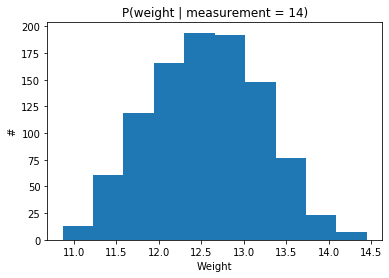

In [10]:
marginal = EmpiricalMarginal(posterior, "weight")
plt.hist([marginal().item() for _ in range(1000)],)
plt.title("P(weight | measurement = 14)")
plt.xlabel("Weight")
plt.ylabel("#")

<h4><span class="header-section-number">4.3.0.1</span> Shapes in distribution:</h4>
<p>We know that PyTorch tensor have single <code>shape</code> attribute, <code>Distribution</code>s have two shape attributes with special meaning. * <code>.batch_shape</code>: Indices over <code>.batch_shape</code> denote conditionally independent random variables, * <code>.event_shape</code>: indices over <code>.event_shape</code> denote dependent random variables (ie one draw from a distribution).</p>
<p>These two combine to define the total shape of a sample. Thus the total shape of <code>.log_prob()</code> of distribution is <code>.batch_shape</code>.</p>
<p>Also, <code>Distribution.sample()</code> also has a <code>sample_shape</code> attribute that indexes over independent and identically distributed(iid) random variables.</p>


<pre><code>      |      iid     | independent | dependent
------+--------------+-------------+------------
shape = sample_shape + batch_shape + event_shape</code></pre>
<p>To know more about + , go through <a href="https://pytorch.org/docs/master/notes/broadcasting.html">broadcasting tensors in PyTorch</a>.</p>

<h3><span class="header-section-number">4.3.1</span> Examples</h3>
<p>One way to introduce batch_shape is use <code>expand</code>.</p>

In [11]:
d = dist.MultivariateNormal(torch.zeros(3), torch.eye(3, 3)).expand([5]) # expand - 3 of these Multivariate Normal Dists
print("batch_shape: ", d.batch_shape)

batch_shape:  torch.Size([5])


In [12]:
print("event_shape: ", d.event_shape)

event_shape:  torch.Size([3])


In [13]:
x = d.sample()
print("x shape: ", x.shape)          # == sample_shape + batch_shape + event_shape

x shape:  torch.Size([5, 3])


In [14]:
print("d.log_prob(x) shape:", d.log_prob(x).shape)  # == batch_shape

d.log_prob(x) shape: torch.Size([5])


<p>The other way is using <code>plate</code> context manager.</p>
<p>Pyro models can use the context manager <code>pyro.plate</code> to declare that certain batch dimensions are independent. Inference algorithms can then take advantage of this independence to e.g. construct lower variance gradient estimators or to enumerate in linear space rather than exponential space.</p>

In [16]:
with pyro.plate("x_axis", 5):
    d = dist.MultivariateNormal(torch.zeros(3), torch.eye(3, 3))
    x = pyro.sample("x", d)

x.shape

torch.Size([5, 3])

<p>In fact, we can also nest <code>plates</code>. The only thing we need to care about is, which dimensions are independent. Pyro automatically manages this but sometimes we need to explicitely specify the dimensions. Once we specify that, we can leverage PyTorch’s CUDA enabled capabilities to run inference on GPUs.</p>

In [17]:
with pyro.plate("x_axis", 320):
    # within this context, batch dimension -1 is independent
    with pyro.plate("y_axis", 200):
        # within this context, batch dimensions -2 and -1 are independent

SyntaxError: unexpected EOF while parsing (<ipython-input-17-c756cd874096>, line 4)

<p>Note that we always count from the right by using negative indices like <span class="math inline">\(-2\)</span>, <span class="math inline">\(-1\)</span>.</p>